# Analyze Metrics and Conduct Inference.ipynb

In [11]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from Analysis_Functions import *


In [12]:
# Load Combined_Data.xlsx
combined_data = pd.read_excel('Combined_Data.xlsx')

# GSM8k data - limit to task = "gsm8k"
gsm8k_data = combined_data[combined_data['task'] == 'gsm8k']

# Creative writing data - limit to task = "cw"
cw_data = combined_data[combined_data['task'] == 'cw']


## Complexity

Run generic function for number of reasoning steps, sentence length, FRE

Bar charts of differences

Generic function for assessment of ease of review too

In [13]:
means_table(combined_data, 'num_linebreaks')
means_table(combined_data, 'num_sentences')
means_table(combined_data, 'num_step_i')
means_table(combined_data, 'num_1_dot_etc')
means_table(combined_data, 'sentence_length')
means_table(combined_data, 'fres')


  model   task  ape_zero_shot_cot  direct_prompting  least_to_most  \
0  gpt4     cw               0.00              0.00           0.00   
2   td3     cw               4.37              0.98           7.03   
1  gpt4  gsm8k               0.00              0.00           0.00   
3   td3  gsm8k               4.44              0.16           4.16   

   manual_cot  manual_few_shot  self_refine  tree_of_thought  zero_shot_cot  
0        0.00             0.00         1.56             4.00           0.00  
2        6.01             1.07         3.10            11.29           4.67  
1        0.00             0.00         2.20             5.11           0.00  
3        0.00             0.00         1.16             1.39           3.25  
  model   task  ape_zero_shot_cot  direct_prompting  least_to_most  \
0  gpt4     cw              15.43             11.32          14.76   
2   td3     cw              10.12              7.60          17.82   
1  gpt4  gsm8k               3.15              1.

In [14]:
# Differences of scores 
# Responses versus prompts
# Responses versus provided answer for GSM8k

# Variables: 
# 'num_linebreaks_prompts': num_linebreaks_prompts,
# 'num_sentences_prompts': num_sentences_prompts,
# 'num_step_i_prompts': num_step_i_prompts,
# 'num_1_dot_etc_prompts': num_1_dot_etc_prompts,
# 'sentence_length_prompts': sentence_length_prompts,
# 'fres_prompts': fres_prompts,
# 'num_linebreaks_provided': num_linebreaks_provided,
# 'num_sentences_provided': num_sentences_provided,
# 'num_step_i_provided': num_step_i_provided,
# 'num_1_dot_etc_provided': num_1_dot_etc_provided
# Loop over variables and create differences variables
comparison_vars = ['num_linebreaks_prompts', 'num_sentences_prompts', 'num_step_i_prompts', 'num_1_dot_etc_prompts', 'sentence_length_prompts', 'fres_prompts', 'num_linebreaks_provided', 'num_sentences_provided', 'num_step_i_provided', 'num_1_dot_etc_provided']
for var in comparison_vars:
    # Create a variable that is the difference between the prompts and responses
    # var + '_diff'
    combined_data[var + '_diff'] = combined_data[var] - combined_data[var.replace('_prompts', '').replace('_provided', '')]

# Aggregate "_diff" variables by model, task, method
differences = combined_data[['model', 'task', 'method', 'num_linebreaks_prompts_diff', 'num_sentences_prompts_diff', 'num_step_i_prompts_diff', 'num_1_dot_etc_prompts_diff', 'sentence_length_prompts_diff', 'fres_prompts_diff', 'num_linebreaks_provided_diff', 'num_sentences_provided_diff', 'num_step_i_provided_diff', 'num_1_dot_etc_provided_diff']].groupby(['model', 'task', 'method']).agg(['mean']).reset_index()


In [15]:
# Fix axis
#differences_noax = differences.rename_axis([None, None], axis=1).reset_index()

# Sort rows by task - gsm8k task first, then cw
# Sort by model - text-davinci-003 first, then gpt4
#change_per_table_pivot = change_per_table_pivot.sort_values(by=['task', 'model'], ascending=[True, True]).reset_index().drop(columns=['index'])

#print(avg_accuracy_quality_pivot.columns)

flattened_cols = [''.join(col).strip().replace('mean', '') for col in differences.columns.values]
#change_per_table_pivot.columns = flattened_cols
differences.columns = flattened_cols

#differences_noax
differences


,model,task,method,num_linebreaks_prompts_diff,num_sentences_prompts_diff,num_step_i_prompts_diff,num_1_dot_etc_prompts_diff,sentence_length_prompts_diff,fres_prompts_diff,num_linebreaks_provided_diff,num_sentences_provided_diff,num_step_i_provided_diff,num_1_dot_etc_provided_diff
0,gpt4,cw,ape_zero_shot_cot,0.00,-9.45,-0.90,-0.81,-9.978841,14.9564,NaN,NaN,NaN,NaN
1,gpt4,cw,direct_prompting,0.00,-6.33,0.00,2.00,-10.032668,15.4201,NaN,NaN,NaN,NaN
2,gpt4,cw,least_to_most,0.00,22.23,0.00,9.51,-2.662473,6.8655,NaN,NaN,NaN,NaN
3,gpt4,cw,manual_cot,0.00,23.06,0.00,11.06,-3.258196,5.5555,NaN,NaN,NaN,NaN
4,gpt4,cw,manual_few_shot,0.00,17.74,0.00,6.00,-4.185974,7.2873,NaN,NaN,NaN,NaN
5,gpt4,cw,self_refine,0.00,-9.70,0.00,2.48,1.431063,8.6439,NaN,NaN,NaN,NaN
6,gpt4,cw,tree_of_thought,0.00,-27.43,0.00,-1.93,-4.116316,15.8285,NaN,NaN,NaN,NaN
7,gpt4,cw,zero_shot_cot,0.00,-9.94,-0.66,-1.58,-10.439468,17.6945,NaN,NaN,NaN,NaN
8,gpt4,gsm8k,ape_zero_shot_cot,0.00,0.21,-0.39,-1.57,NaN,NaN,3.42,-0.47,-0.39,-0.67
9,gpt4,gsm8k,direct_prompting,0.00,1.85,0.00,-0.90,NaN,NaN,3.42,1.17,0.00,0.00


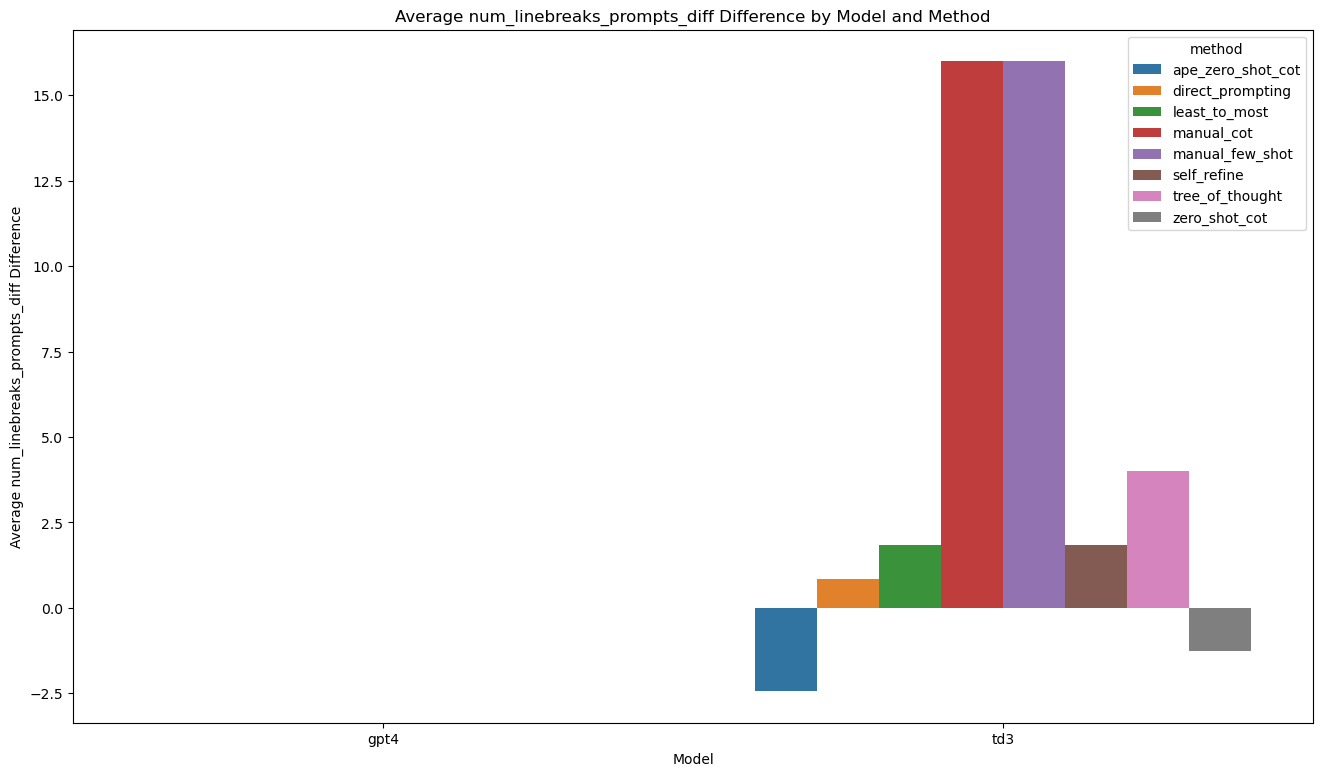

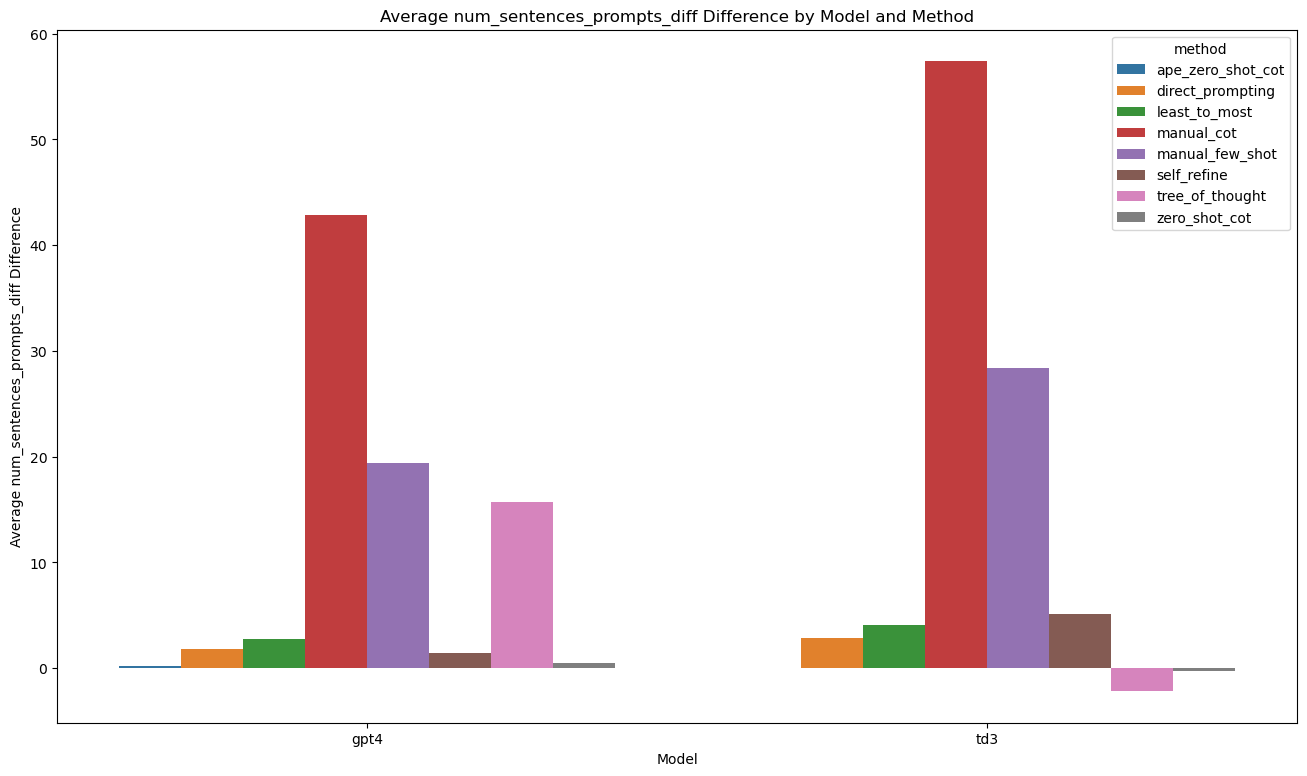

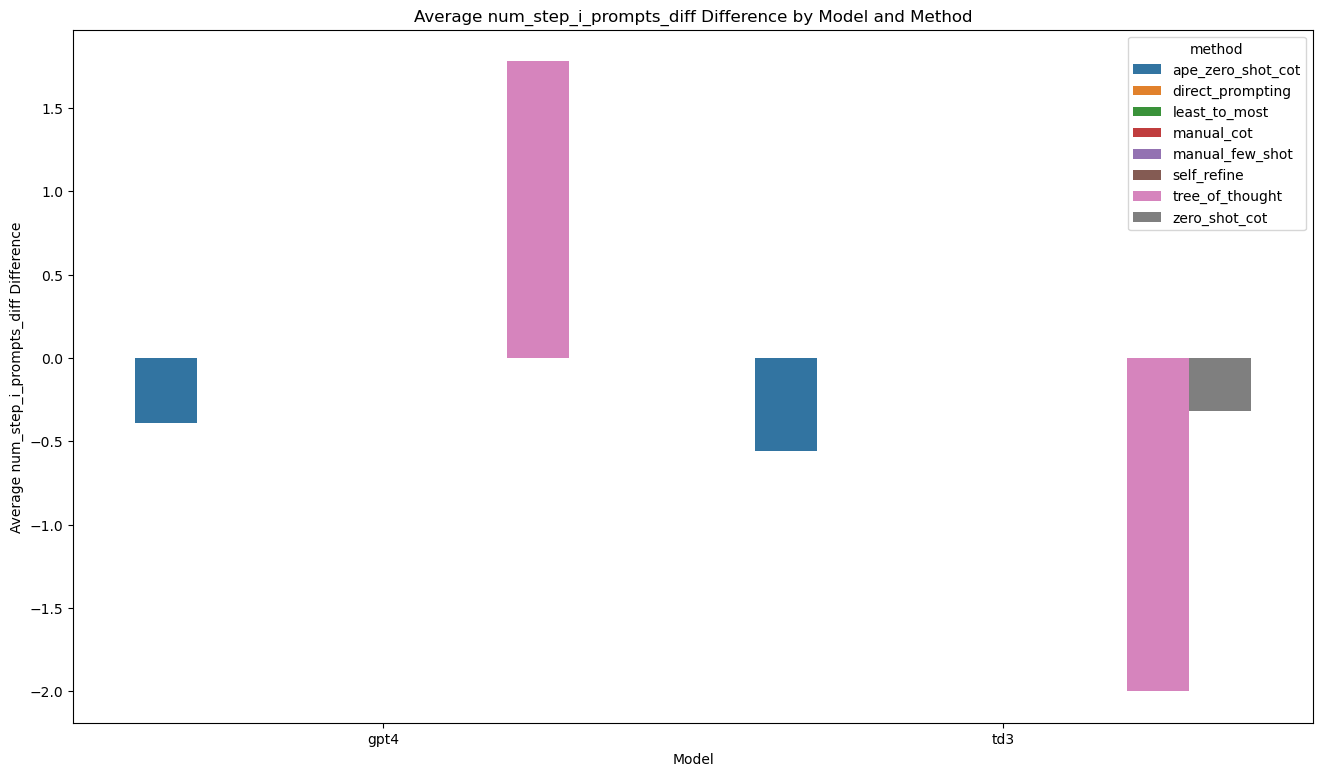

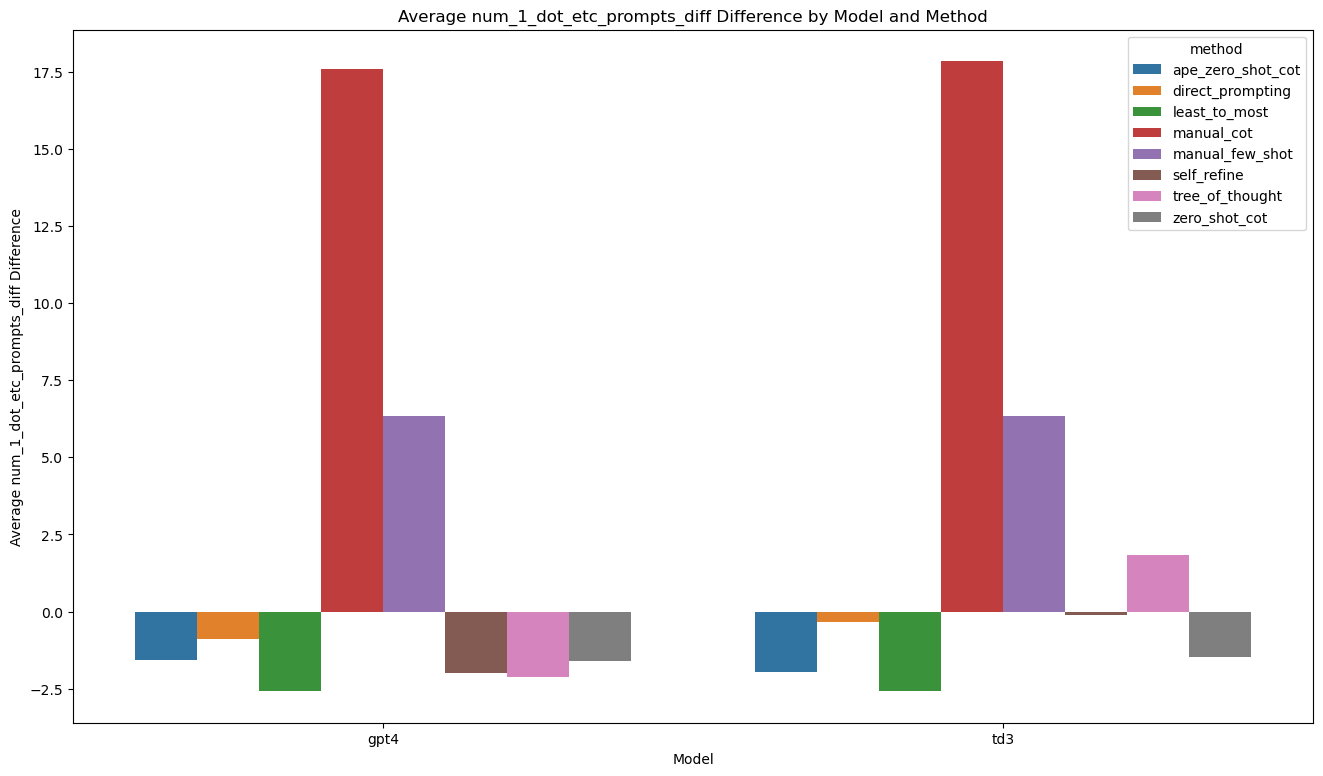

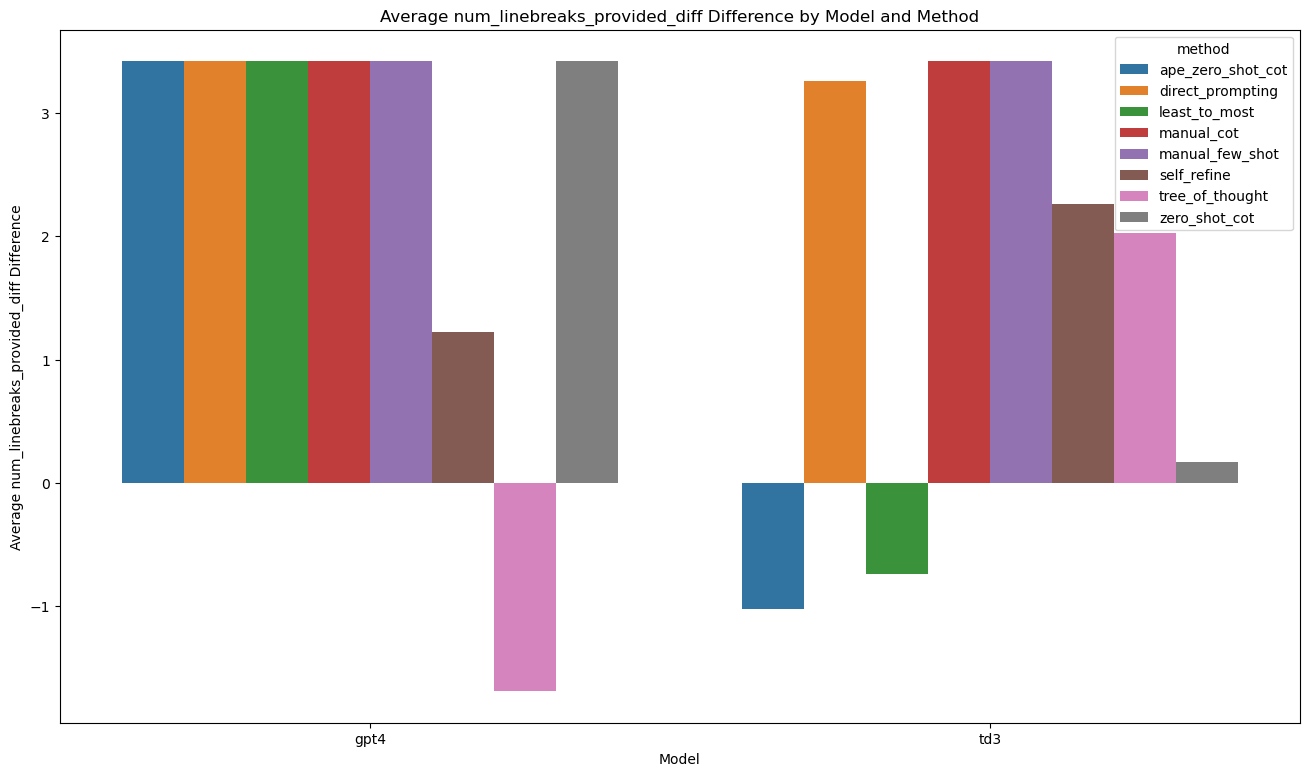

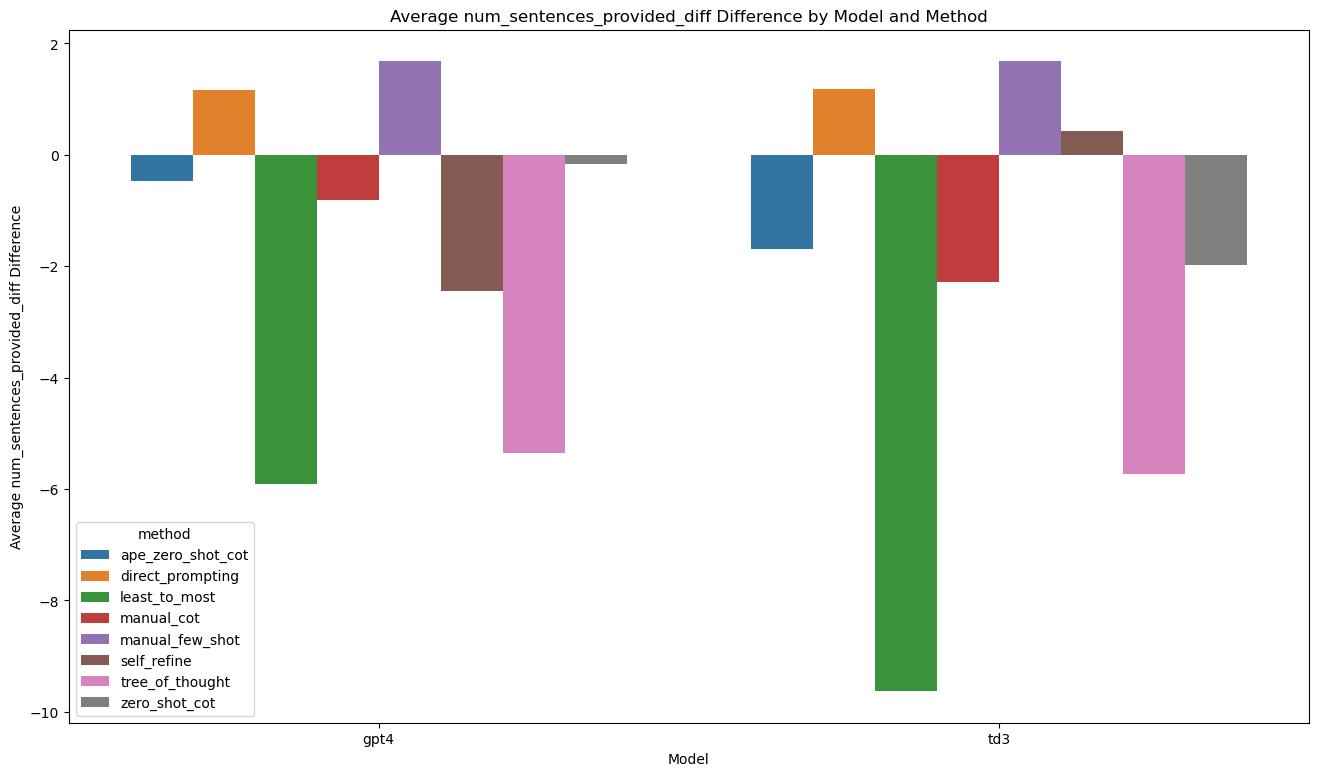

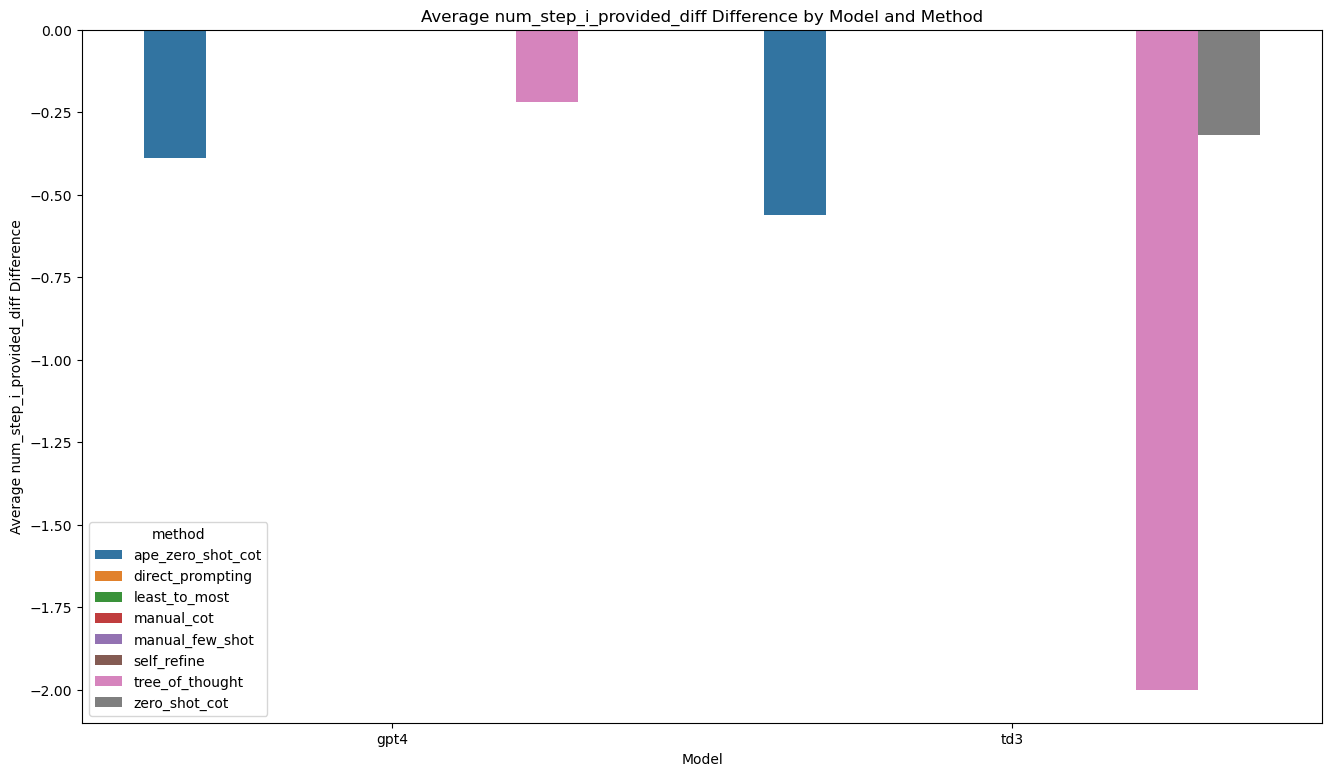

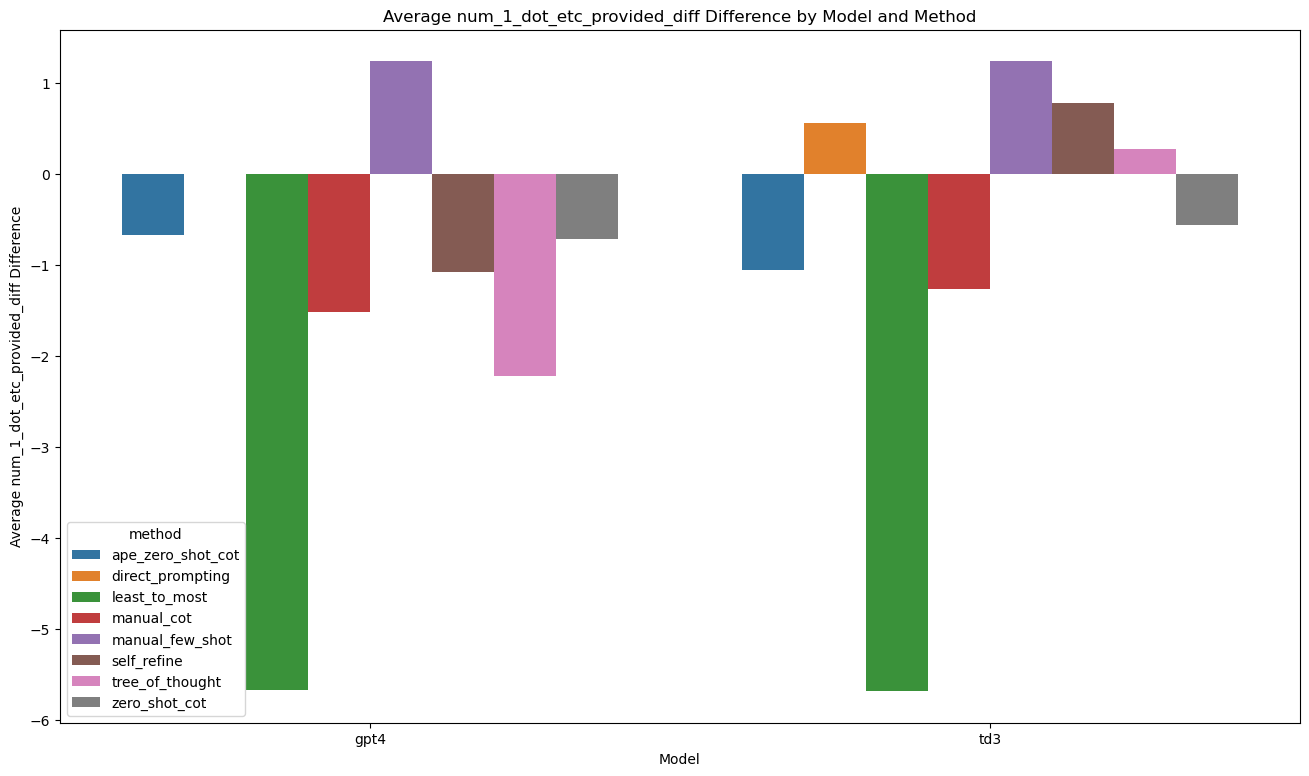

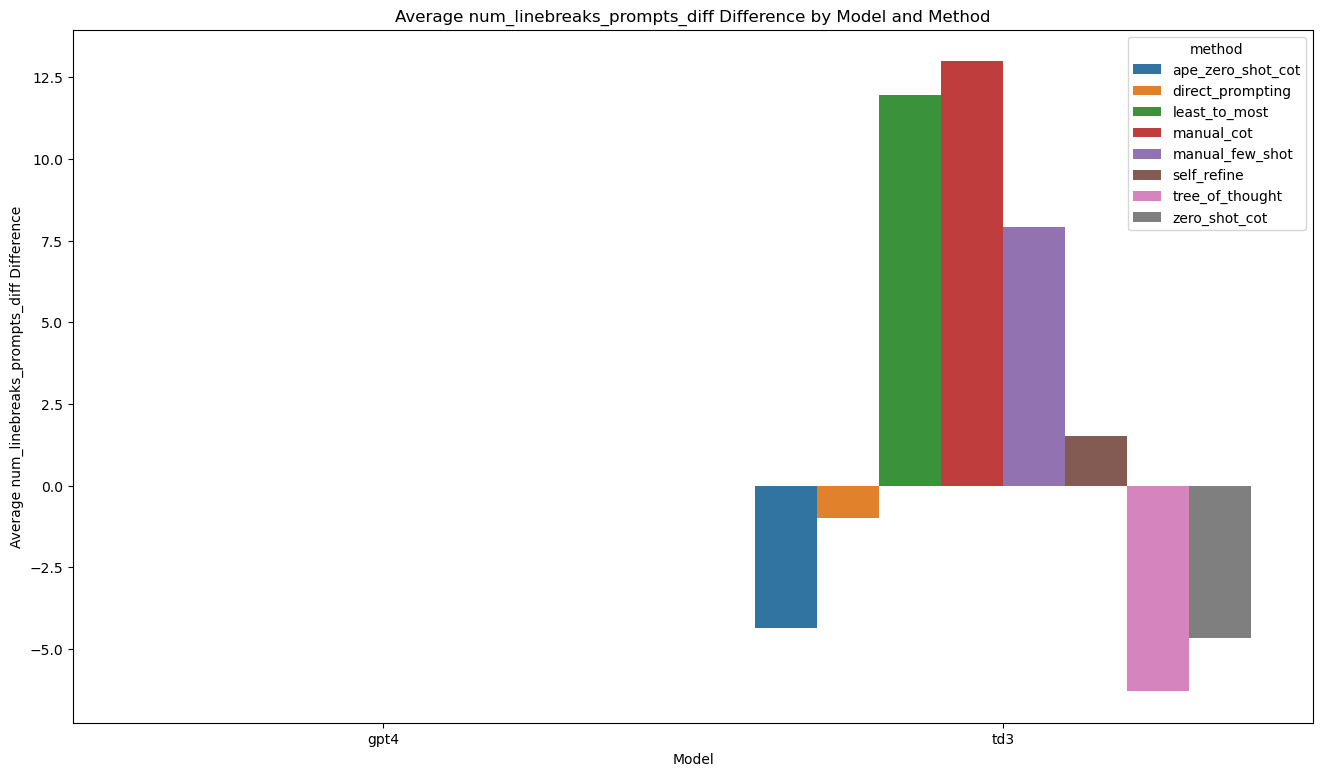

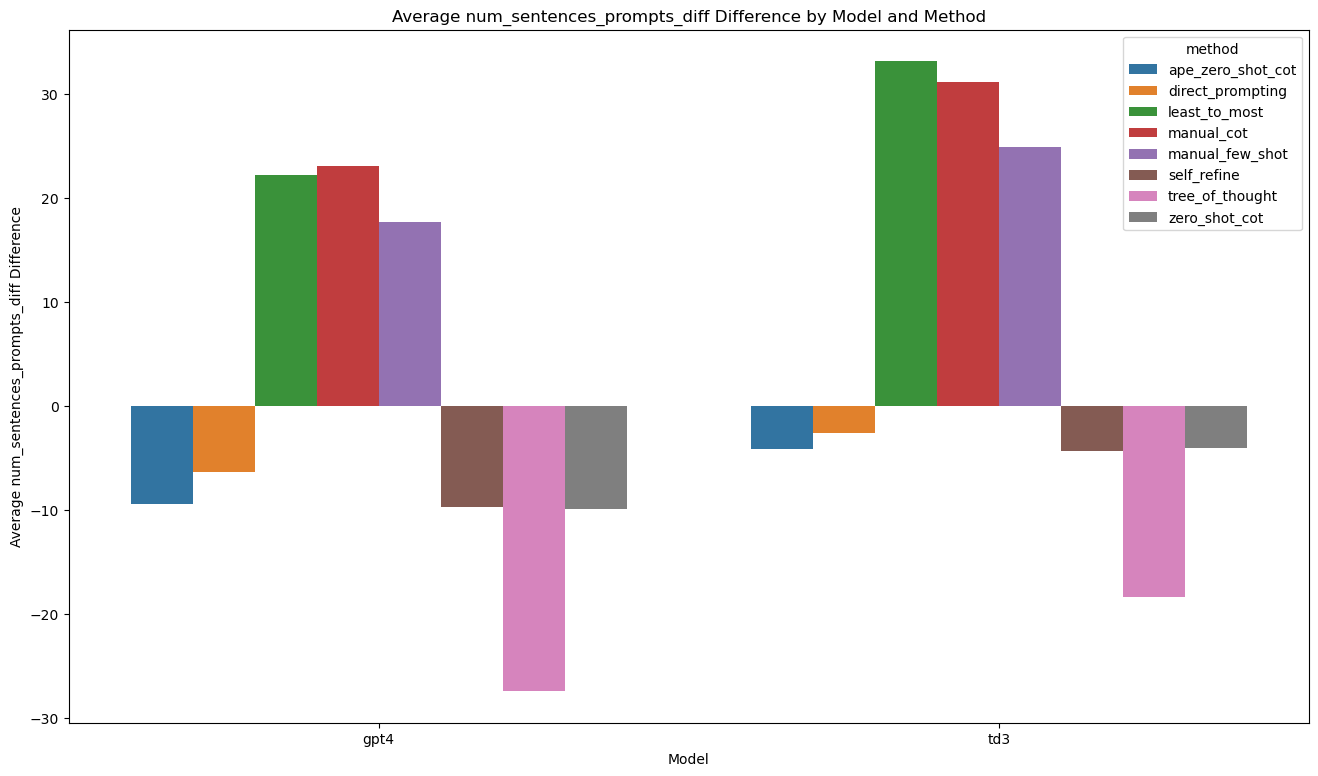

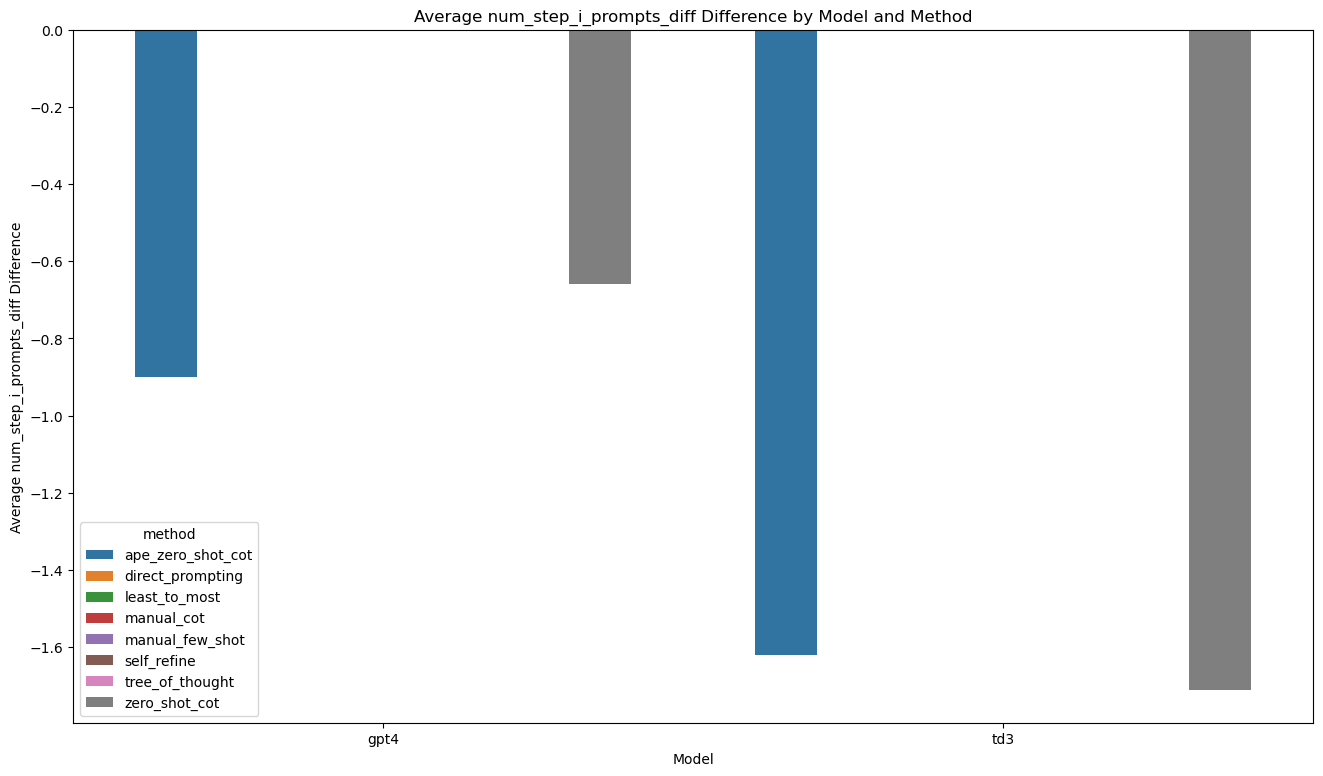

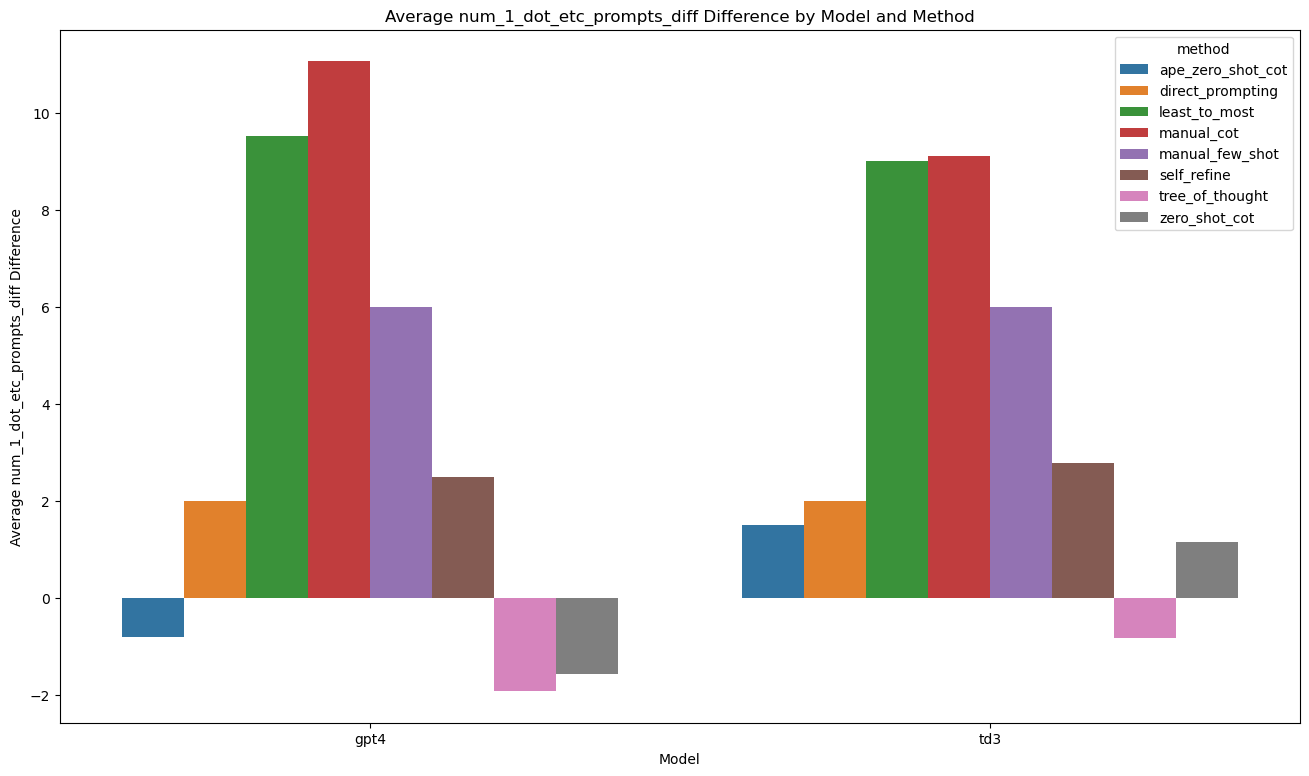

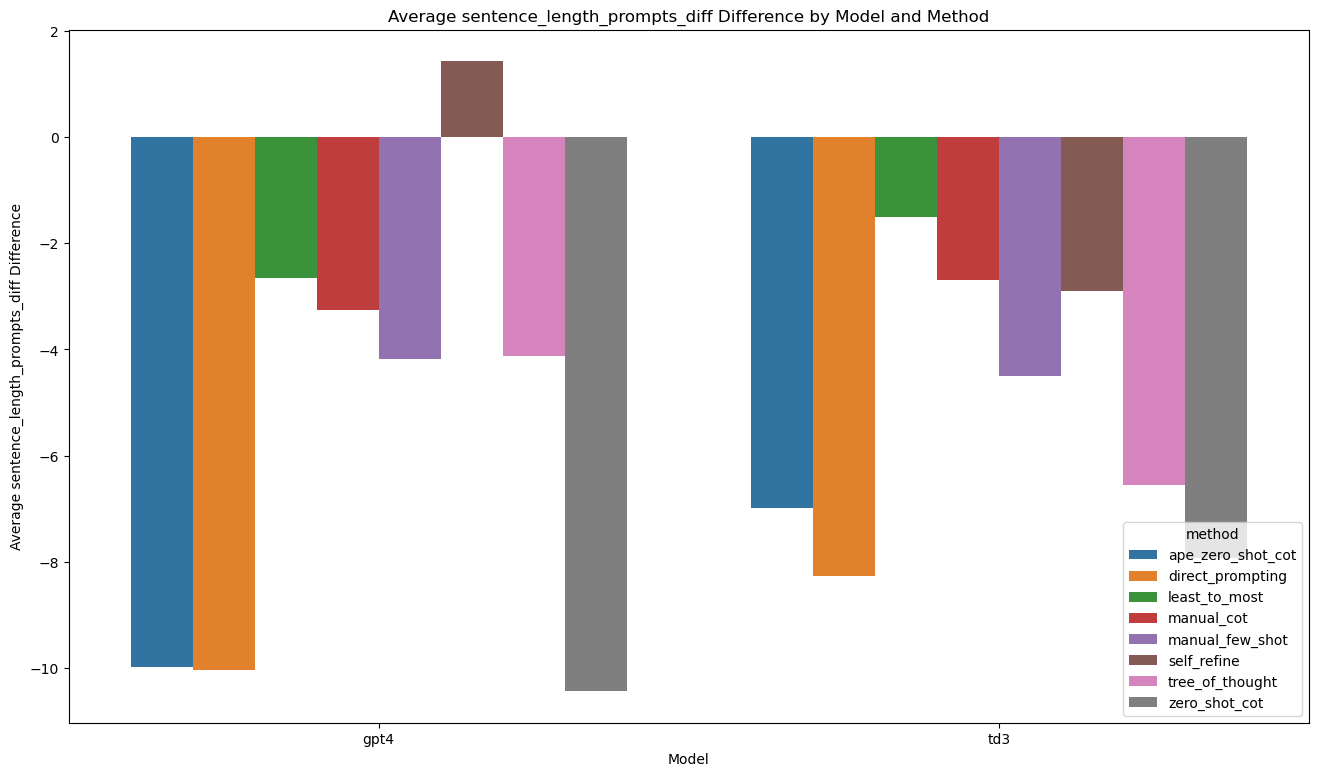

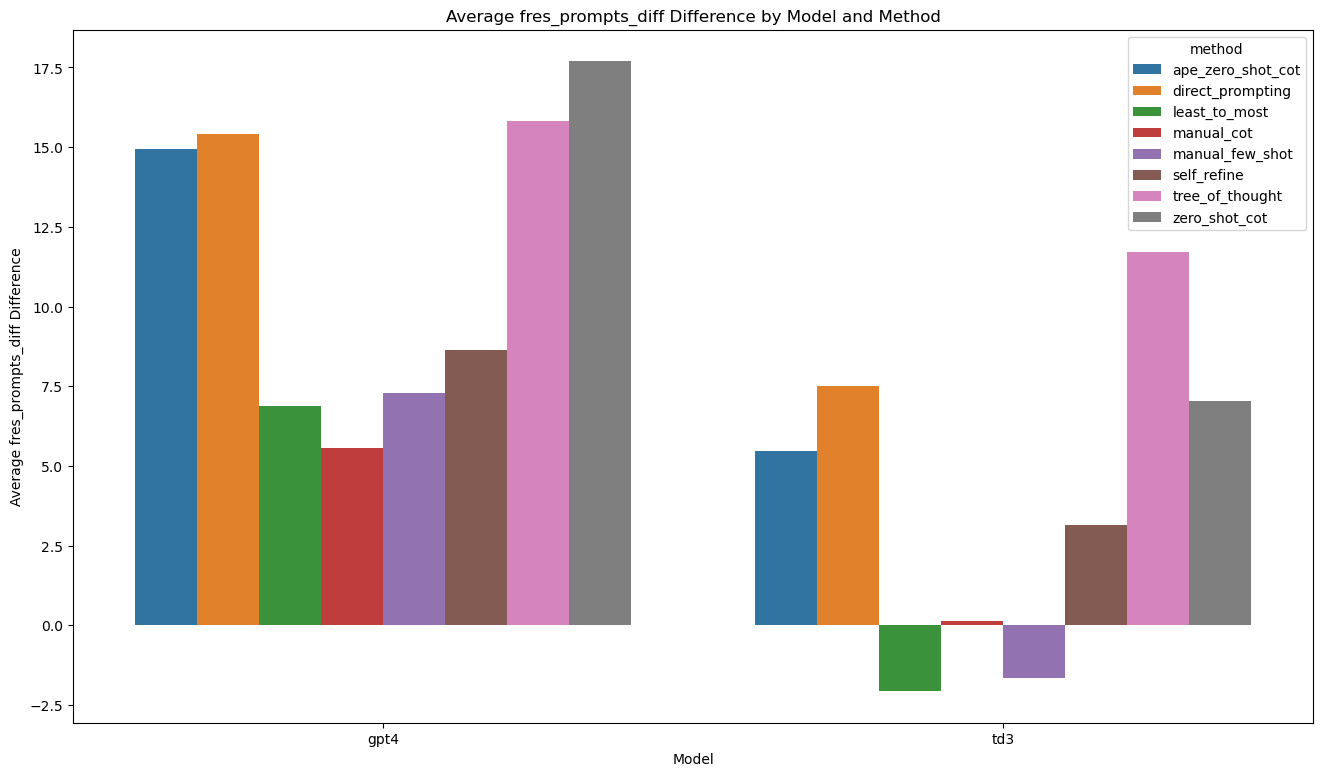

In [16]:
# Create plots of _diff variables by model, task, method

# GSM8k plots
# Loop over variables
comparison_vars_gsm8k = ['num_linebreaks_prompts_diff', 'num_sentences_prompts_diff', 'num_step_i_prompts_diff', 'num_1_dot_etc_prompts_diff', 'num_linebreaks_provided_diff', 'num_sentences_provided_diff', 'num_step_i_provided_diff', 'num_1_dot_etc_provided_diff']
for var in comparison_vars_gsm8k:
    # Plot
    plt.figure(figsize=(16, 9))
    sns.barplot(x='model', y=var, hue='method', data=differences[differences['task'] == 'gsm8k'])
    plt.xlabel('Model')
    plt.ylabel('Average ' + var + ' Difference')
    plt.title('Average ' + var + ' Difference by Model and Method')
    plt.savefig('../Output/gsm8k_' + var + '.png')
    plt.show()

# Creative writing plots
# Loop over variables
comparison_vars_cw = ['num_linebreaks_prompts_diff', 'num_sentences_prompts_diff', 'num_step_i_prompts_diff', 'num_1_dot_etc_prompts_diff', 'sentence_length_prompts_diff', 'fres_prompts_diff']
for var in comparison_vars_cw:
    # Plot
    plt.figure(figsize=(16, 9))
    sns.barplot(x='model', y=var, hue='method', data=differences[differences['task'] == 'cw'])
    plt.xlabel('Model')
    plt.ylabel('Average ' + var + ' Difference')
    plt.title('Average ' + var + ' Difference by Model and Method')
    plt.savefig('../Output/cw_' + var + '.png')
    plt.show()


In [17]:
means_table(combined_data, 'ease_of_review_1_easy_10_hard')


  model   task  ape_zero_shot_cot  direct_prompting  least_to_most  \
0  gpt4     cw                8.2               1.6            7.3   
2   td3     cw                3.5               NaN            3.0   
1  gpt4  gsm8k                NaN               NaN            NaN   
3   td3  gsm8k                NaN               2.9            NaN   

   manual_cot  manual_few_shot  self_refine  tree_of_thought  zero_shot_cot  
0         3.2              4.4          4.5              4.2            8.2  
2         2.3              2.1          4.1              8.5            3.8  
1         NaN              NaN          NaN              NaN            NaN  
3         NaN              NaN          NaN              NaN            NaN  
